**Library Imports**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
import numpy as np   # N-Dimensional arrays and numerical routines
import pandas as pd  # Data structures and data analysis tools
import scipy         # Numerical routines

In [5]:
#import numba        # Decorators for speeding up python functions

In [6]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [7]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [8]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [9]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [10]:
from IPython.display import display

In [11]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [12]:
import ipywidgets

**Settings & Options**

In [13]:
np.set_printoptions(precision=5, threshold=100, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [14]:
pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [15]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [16]:
# os.system('ipython nbconvert --to pdf {filename}.ipynb')

**Custom functions**

In [17]:
latex_path = os.path.join(os.getcwd(), 'latex', 'figures')
def figure_path(fname): 
    return os.path.join(latex_path, fname)
print(os.getcwd())

/home/jaan/Dropbox/Projects/Crowd-Dynamics/documentation/notebooks


**Resources**

- [Simulating dynamical features of escape panic](http://www.nature.com/nature/journal/v407/n6803/full/407487a0.html)

- [Patient and impatient pedestrians in a spatial game for egress congestion](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.87.012802)

- [Power Law](http://motion.cs.umn.edu/PowerLaw/)

- [Universal Power Law Governing Pedestrian Interactions](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.238701)


# Scratch

In [60]:
%matplotlib inline

In [196]:
arr = np.random.normal(size=100)
arr

array([-1.25365,  1.52496, -1.02614, -0.47017, -0.29688,  0.32721,
       -0.93298, -1.73044, -1.73019, -0.08648,  1.02083,  1.47971,
       -0.78265,  1.08838, -1.40008,  1.51598,  0.17548,  1.39841,
       -1.44167,  0.21825,  0.42296, -1.25469, -0.09609, -0.49864,
        1.08646,  1.7017 ,  0.6594 ,  0.96482, -0.1842 ,  0.05003,
        0.15245, -1.47594,  0.54281, -1.16774, -0.13645, -0.1745 ,
        1.25178, -0.67469, -0.08243, -0.58449, -0.32239,  1.33452,
        1.26053, -0.35609, -0.2644 , -0.59581,  0.41732,  0.23181,
       -0.4333 , -0.4726 ,  0.37686,  1.31819, -0.50286,  0.1203 ,
       -1.05941, -0.6042 , -0.30088,  1.08973, -1.45585, -1.694  ,
       -0.3675 ,  0.36091,  1.29625, -0.10339, -2.13642,  1.60757,
        0.50746,  0.32232, -0.87009, -1.17955, -0.36873, -0.21138,
        0.49076,  0.87918,  0.56158, -1.28678, -0.87963,  0.29891,
        0.62941, -0.15799,  1.82109,  0.07791, -0.37344,  1.0669 ,
       -0.61092,  0.25873, -0.34979, -2.12613, -0.74733, -0.02

In [197]:
arr -= arr.min()

In [198]:
arr /= arr.max()

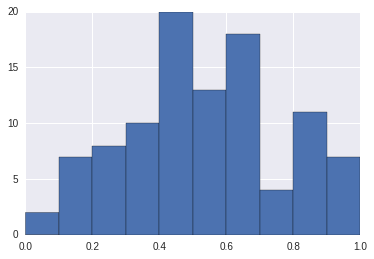

In [204]:
plt.hist(arr, bins=10);

In [194]:
arr.sort()

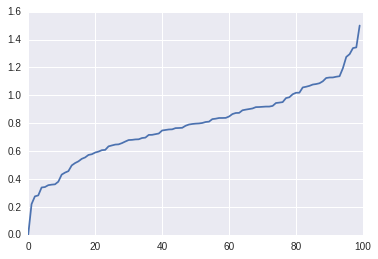

In [188]:
plt.plot(np.arange(arr.size), arr);

# Numba

In [18]:
import numba

In [19]:
@numba.jit(nopython=True, nogil=True)
def rotate90(vec2d):
    """
    90 degree counterclockwise rotation for 2D vector.

    (x, y) -> (-y, x)

    https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    """
    rot = np.zeros_like(vec2d)
    rot[0] = -vec2d[1]
    rot[1] = vec2d[0]
    return rot


@numba.jit(nopython=True, nogil=True)
def rotate270(vec2d):
    """
    90 degree clockwise rotation for 2D vector.
    
    (x, y) -> (y, -x)

    https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    """
    rot = np.zeros_like(vec2d)
    rot[0] = vec2d[1]
    rot[1] = -vec2d[0]
    return rot


In [29]:
arr = np.random.uniform(size=2)

In [32]:
arr

array([ 0.10087,  0.84026])

In [33]:
rotate90(arr)

array([-0.84026,  0.10087])

In [37]:
arr.__len__()

2

In [41]:
%timeit arr / np.hypot(arr[0], arr[1])

The slowest run took 6.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.04 µs per loop


In [51]:
eps = sys.float_info.epsilon

In [59]:
np.sqrt(eps)

1.49011611938e-08

In [57]:
np.isclose(0, eps)

True

In [206]:
arr = np.random.uniform(size=20).reshape((10, 2))

In [207]:
arr

array([[ 0.67165,  0.90778],
       [ 0.68531,  0.57153],
       [ 0.72015,  0.34486],
       [ 0.37677,  0.29657],
       [ 0.32871,  0.10699],
       [ 0.91691,  0.24243],
       [ 0.34041,  0.03255],
       [ 0.78467,  0.12848],
       [ 0.64543,  0.18   ],
       [ 0.01235,  0.58521]])

In [210]:
np.hypot(arr[0], arr[1])

array([ 0.95957,  1.07271])

In [211]:
np.hypot(arr[:, 0], arr[:, 1])

array([ 1.12924,  0.89236,  0.79847,  0.47949,  0.34569,  0.94842,
        0.34196,  0.79511,  0.67006,  0.58534])

In [213]:
np.hypot(*arr.T)

array([ 1.12924,  0.89236,  0.79847,  0.47949,  0.34569,  0.94842,
        0.34196,  0.79511,  0.67006,  0.58534])

In [219]:
arr / np.hypot(arr[:, 0], arr[:, 1]).reshape((len(arr), 1))

array([[ 0.59478,  0.80389],
       [ 0.76798,  0.64047],
       [ 0.90192,  0.4319 ],
       [ 0.78577,  0.61851],
       [ 0.9509 ,  0.3095 ],
       [ 0.96678,  0.25562],
       [ 0.99546,  0.0952 ],
       [ 0.98686,  0.16159],
       [ 0.96324,  0.26864],
       [ 0.0211 ,  0.99978]])